# Práctica 4: Tarea de clasificación

In [1]:
!nvidia-smi

Fri Oct 11 11:05:23 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P0             14W /   60W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Dataset

### Atributos

    - FL_DATE: Fecha del vuelo
    - OP_CARRIER: Identificador de la aerolínea
    - OP_CARRIER_FL_NUM: Número de vuelo
    - ORIGIN: Código del aeropuerto de origen
    - DEST: Código del aeropuerto de destino
    - CRS_DEP_TIME: Hora planeada de salida
    - DEP_TIME: Hora actual de salida
    - DEP_DELAY: Retraso en la salida en minutos
    - TAXI_OUT: El tiempo transcurrido entre la salida desde el aeropuerto de origen y el atributo "WHEELS_OFF"
    - WHEELS_OFF: Hora a la que las llantas del avión dejaron de tocar el suelo
    - CRS_ARR_TIME: Hora planeada de llegada
    - ARR_DELAY: Retraso total en la llegada en minutos (atributo a predecir)
    - CRS_ELAPSED_TIME: Tiempo total planeado del vuelo
    - DISTANCE: Distancia entre los dos aeropuertos

# Análisis exploratorio

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
trn_airdt = pd.read_csv('train_airlines_delay_challenge.csv')
airlin_df = pd.DataFrame(trn_airdt)
airlin_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0


In [5]:
print(airlin_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000000 entries, 0 to 8999999
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   OP_CARRIER_FL_NUM  int64  
 3   ORIGIN             object 
 4   DEST               object 
 5   CRS_DEP_TIME       float64
 6   DEP_TIME           float64
 7   DEP_DELAY          float64
 8   TAXI_OUT           float64
 9   WHEELS_OFF         float64
 10  CRS_ARR_TIME       float64
 11  ARR_DELAY          float64
 12  CRS_ELAPSED_TIME   float64
 13  DISTANCE           float64
dtypes: float64(9), int64(1), object(4)
memory usage: 961.3+ MB
None


In [6]:
print(airlin_df.describe())

       OP_CARRIER_FL_NUM  CRS_DEP_TIME      DEP_TIME     DEP_DELAY  \
count       9.000000e+06  9.000000e+06  9.000000e+06  9.000000e+06   
mean        2.245577e+03  1.326138e+03  1.332794e+03  8.889274e+00   
std         1.877307e+03  4.730146e+02  4.856179e+02  3.604610e+01   
min         1.000000e+00  1.000000e+00  1.000000e+00 -2.340000e+02   
25%         6.970000e+02  9.230000e+02  9.250000e+02 -5.000000e+00   
50%         1.684000e+03  1.320000e+03  1.327000e+03 -2.000000e+00   
75%         3.467000e+03  1.725000e+03  1.733000e+03  7.000000e+00   
max         9.320000e+03  2.359000e+03  2.400000e+03  1.805000e+03   

           TAXI_OUT    WHEELS_OFF  CRS_ARR_TIME     ARR_DELAY  \
count  9.000000e+06  9.000000e+06  9.000000e+06  9.000000e+06   
mean   1.581331e+01  1.355605e+03  1.495601e+03  4.658041e+00   
std    9.185871e+00  4.869539e+02  4.932537e+02  3.852880e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00 -2.380000e+02   
25%    1.000000e+01  9.390000e+02  1.115000e

In [7]:
airlin_df.shape

(9000000, 14)

In [8]:
print(airlin_df['OP_CARRIER'].value_counts())

OP_CARRIER
WN    1797926
DL    1161883
AA     964037
OO     911078
EV     741999
UA     705030
MQ     464337
US     432815
B6     363733
AS     237757
FL     195679
XE     173991
YV     134190
F9     131721
9E     126681
CO     118819
HA     111342
NK      71815
VX      63501
NW      45931
OH      45735
Name: count, dtype: int64


In [9]:
airlin_df.loc[airlin_df.duplicated()]

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
932,2009-09-09,WN,635,PHX,CMH,945.0,954.0,9.0,8.0,1002.0,1625.0,6.0,220.0,1671.0
13937,2009-09-04,OO,4716,SLC,GTF,1056.0,1059.0,3.0,8.0,1107.0,1225.0,-7.0,89.0,463.0
16722,2009-09-26,FL,129,TPA,ATL,1840.0,1845.0,5.0,88.0,2013.0,2010.0,78.0,90.0,406.0
24106,2009-09-09,MQ,4631,RDU,DCA,1200.0,1153.0,-7.0,12.0,1205.0,1300.0,-8.0,60.0,227.0
25345,2009-09-19,9E,3846,FWA,DTW,645.0,638.0,-7.0,21.0,659.0,745.0,-9.0,60.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999736,2011-06-06,EV,5546,GSP,ATL,1523.0,1520.0,-3.0,10.0,1530.0,1625.0,-8.0,62.0,153.0
2999737,2011-06-12,WN,3296,STL,PHX,810.0,810.0,0.0,11.0,821.0,930.0,-1.0,200.0,1262.0
2999852,2011-06-12,AA,2255,OMA,DFW,1900.0,1856.0,-4.0,12.0,1908.0,2045.0,-9.0,105.0,583.0
2999887,2011-06-11,WN,3994,LAS,SMF,1040.0,1040.0,0.0,11.0,1051.0,1210.0,-12.0,90.0,397.0


### Valores nulos

In [11]:
nan_summary = airlin_df.isnull().sum()

print(nan_summary)

FL_DATE              0
OP_CARRIER           0
OP_CARRIER_FL_NUM    0
ORIGIN               0
DEST                 0
CRS_DEP_TIME         0
DEP_TIME             0
DEP_DELAY            0
TAXI_OUT             0
WHEELS_OFF           0
CRS_ARR_TIME         0
ARR_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
dtype: int64


No hay valores faltantes

Buscamos correlación entre distintas variables

## Formato de fecha

Con el fin de obtener el día de la seman en el que se da el vuelo, esto ya que hay estudios que indican cuales vuelos son más importantes que otros según las llegadas en inicio de semana (Lunes), contra los de placer con llegadas en fin de semana (viernes).

In [14]:
airlin_df['FL_DATE'] = pd.to_datetime(airlin_df['FL_DATE'])

In [17]:
airlin_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0


In [18]:
airlin_df.loc[0,'FL_DATE'].day_name()

'Saturday'

### Creación de nuevos parámetros

Como primer nuevo parámetro agregamos el día de la semana en el que se dá el vuelo

In [31]:
airlin_df['WEEK_DAY'] = airlin_df ['FL_DATE'].dt.day_name()

In [37]:
airlin_df['WEEK_DAY']

0           Saturday
1             Friday
2             Monday
3          Wednesday
4             Friday
             ...    
8999995       Friday
8999996       Friday
8999997       Sunday
8999998       Friday
8999999       Monday
Name: WEEK_DAY, Length: 9000000, dtype: object

In [94]:
print(airlin_df.describe())

                             FL_DATE  OP_CARRIER_FL_NUM  CRS_DEP_TIME  \
count                        9000000       9.000000e+06  9.000000e+06   
mean   2013-07-01 14:21:03.359999488       2.245577e+03  1.326138e+03   
min              2009-01-01 00:00:00       1.000000e+00  1.000000e+00   
25%              2011-04-04 00:00:00       6.970000e+02  9.230000e+02   
50%              2013-07-02 00:00:00       1.684000e+03  1.320000e+03   
75%              2015-09-30 00:00:00       3.467000e+03  1.725000e+03   
max              2017-12-31 00:00:00       9.320000e+03  2.359000e+03   
std                              NaN       1.877307e+03  4.730146e+02   

           DEP_TIME     DEP_DELAY      TAXI_OUT    WHEELS_OFF  CRS_ARR_TIME  \
count  9.000000e+06  9.000000e+06  9.000000e+06  9.000000e+06  9.000000e+06   
mean   1.332794e+03  8.889274e+00  1.581331e+01  1.355605e+03  1.495601e+03   
min    1.000000e+00 -2.340000e+02  1.000000e+00  1.000000e+00  1.000000e+00   
25%    9.250000e+02 -5.000

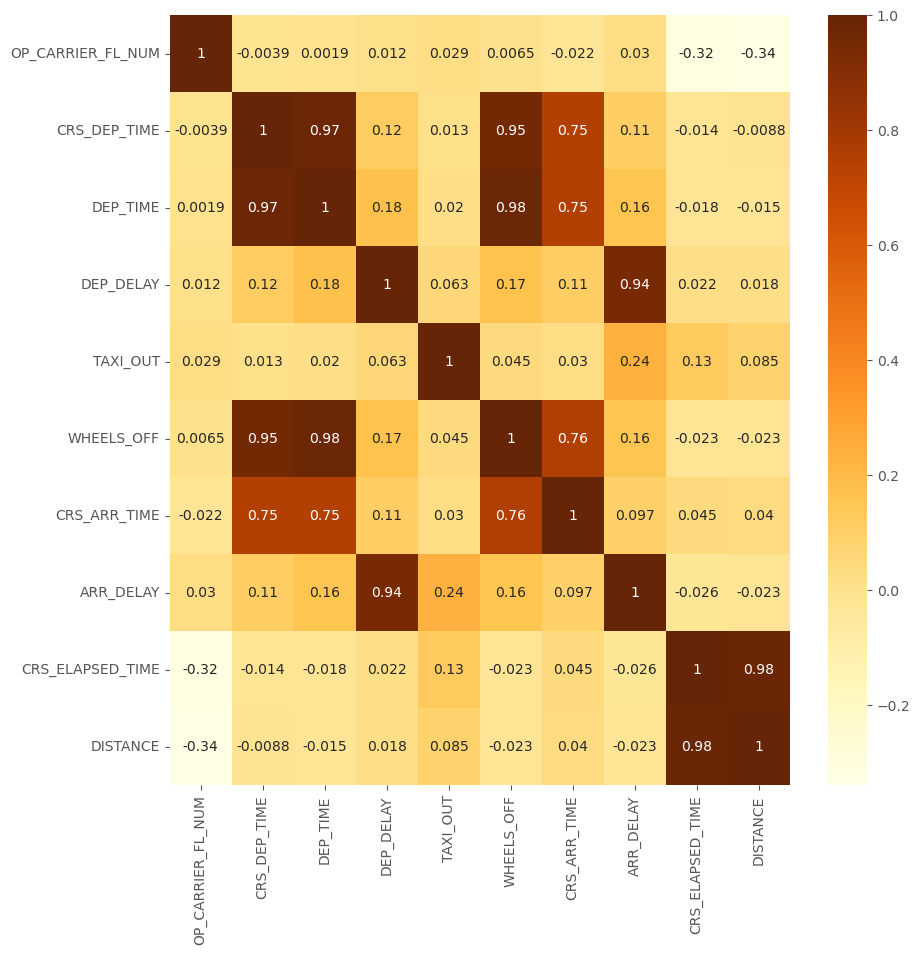

In [24]:
columnas_corr = ['OP_CARRIER_FL_NUM', 
                 'CRS_DEP_TIME','DEP_TIME','DEP_DELAY','TAXI_OUT',
                 'WHEELS_OFF','CRS_ARR_TIME','ARR_DELAY','CRS_ELAPSED_TIME', 
                 'DISTANCE']
corr_matrix = airlin_df[columnas_corr].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix,cmap="YlOrBr", annot=True)
plt.show()

In [29]:
print(airlin_df['DEST'].value_counts())

DEST
ATL    583982
ORD    436100
DFW    372349
DEN    345011
LAX    319097
        ...  
AZA        18
PIE        18
CGI        11
SHD         9
UIN         7
Name: count, Length: 351, dtype: int64


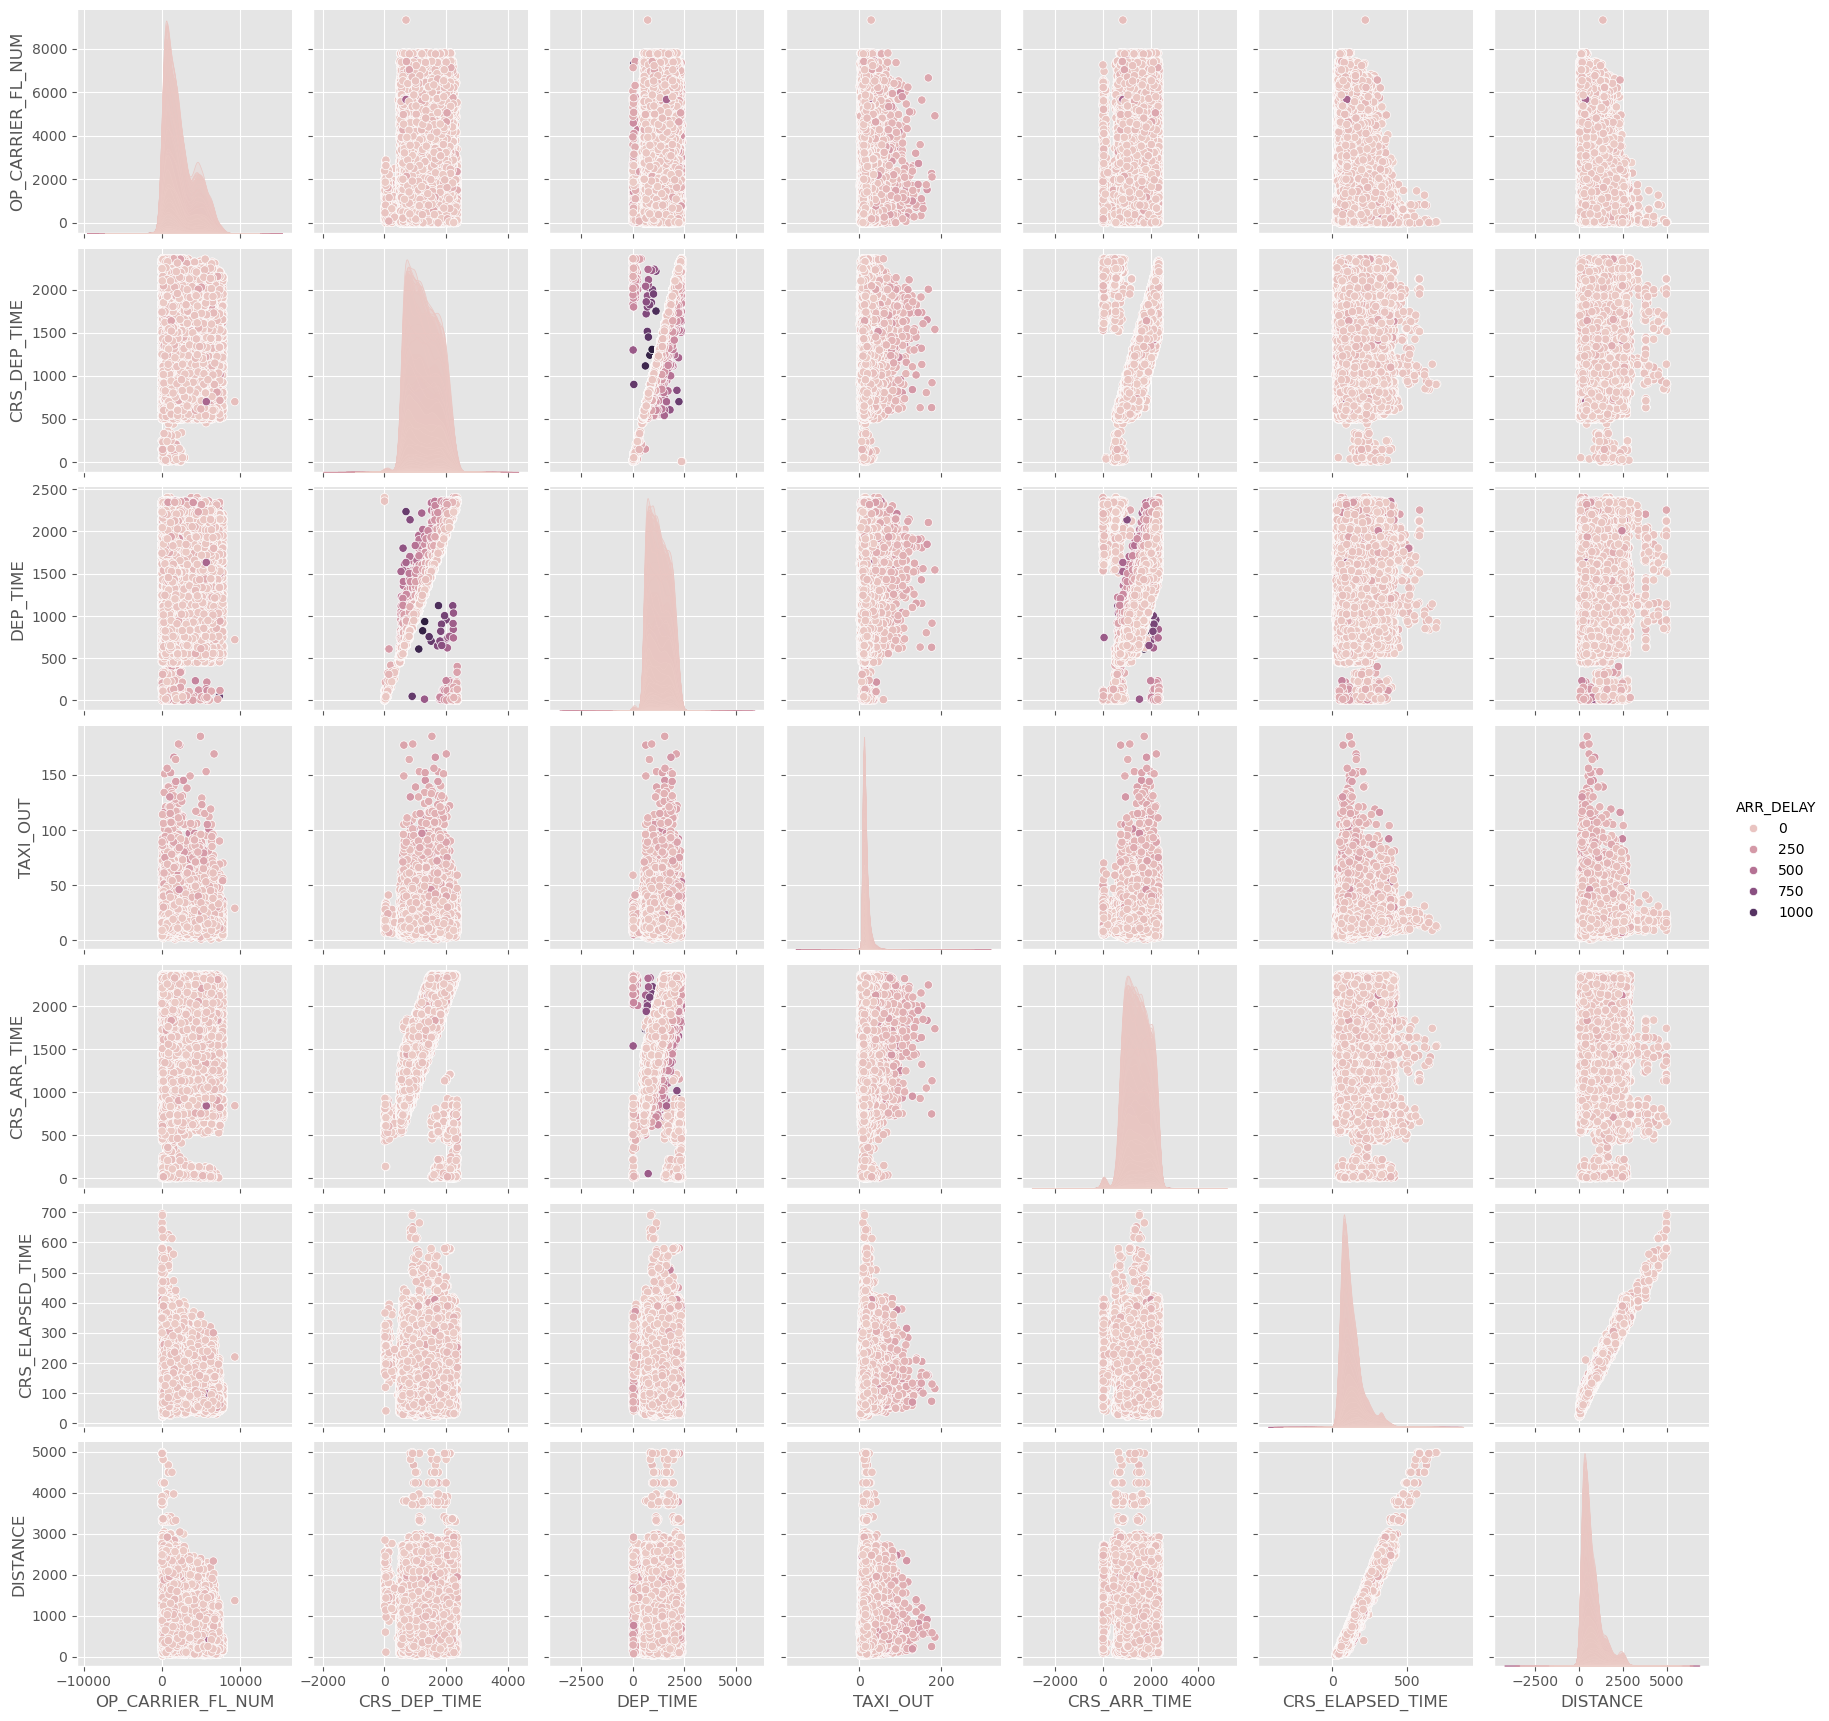

In [38]:
columnas_interes = ['OP_CARRIER_FL_NUM', 
                 'CRS_DEP_TIME','DEP_TIME','TAXI_OUT','CRS_ARR_TIME','CRS_ELAPSED_TIME', 
                 'DISTANCE']
sample_df = airlin_df.sample(n=100000, random_state=42)

sns.pairplot(sample_df, hue='ARR_DELAY', vars=columnas_interes)

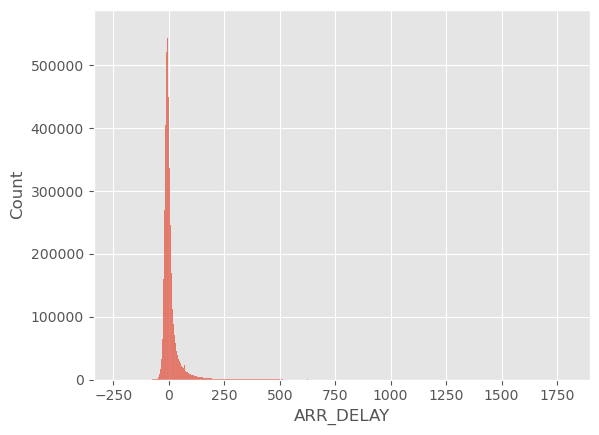

In [51]:
sns.histplot(airlin_df['ARR_DELAY'], bins=1000)
plt.show()

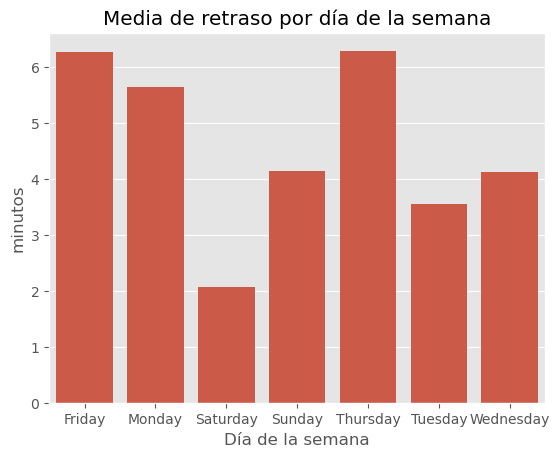

In [62]:
mean_delay_by_day = airlin_df.groupby('WEEK_DAY')['ARR_DELAY'].mean()

# Visualización
sns.barplot(x=mean_delay_by_day.index, y=mean_delay_by_day.values)
plt.title('Media de retraso por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('minutos')
plt.show()

<Axes: ylabel='Frequency'>

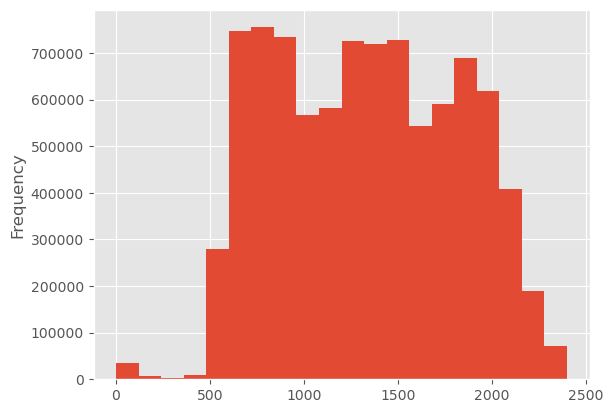

In [99]:
airlin_df['DEP_TIME'].plot(kind= 'hist', bins =20)

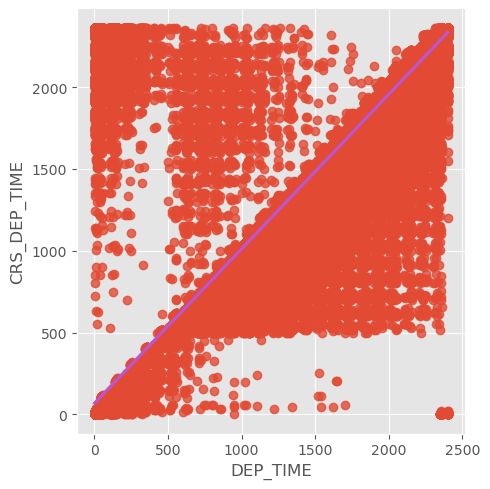

In [101]:
sns.lmplot(x='DEP_TIME', y = 'CRS_DEP_TIME', data = airlin_df, line_kws={'color': 'mediumorchid'})

## Categoricas a nominal

Frecuencia de la categoría
\
Asigno a cada categoría, OP_CARRIER, DEST y ORIGIN, un valor basado en la frecuencia con la que aparece en el dataset

In [69]:
airlin_df['ORIGIN_FREQ'] = airlin_df['ORIGIN'].map(airlin_df['ORIGIN'].value_counts(normalize=True))
airlin_df['DEST_FREQ'] = airlin_df['DEST'].map(airlin_df['DEST'].value_counts(normalize=True))

In [71]:
airlin_df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,WEEK_DAY,ORIGIN_FREQ,DEST_FREQ
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0,Saturday,0.012299,0.018806
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0,Friday,0.027592,0.002916
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0,Monday,0.004985,0.001861
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0,Wednesday,0.035458,0.001450
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0,Friday,0.024460,0.007895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999995,2017-10-27,WN,4233,PDX,SMF,2025.0,2022.0,-3.0,11.0,2033.0,2150.0,-6.0,85.0,479.0,Friday,0.009151,0.007255
8999996,2017-01-06,OO,4482,SEA,SMF,2105.0,2113.0,8.0,23.0,2136.0,2306.0,7.0,121.0,605.0,Friday,0.018792,0.007255
8999997,2017-09-24,WN,3997,DEN,SNA,1400.0,1436.0,36.0,11.0,1447.0,1520.0,33.0,140.0,846.0,Sunday,0.038314,0.006870
8999998,2017-07-28,AS,829,SAN,OGG,720.0,720.0,0.0,10.0,730.0,1016.0,-13.0,356.0,2541.0,Friday,0.013105,0.003725


In [81]:

airlin_df['OPCARR_FREQ'] = airlin_df['OP_CARRIER'].map(airlin_df['OP_CARRIER'].value_counts(normalize=True))

In [83]:
airlin_df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,WEEK_DAY,ORIGIN_FREQ,DEST_FREQ,OPCARR_FREQ
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0,Saturday,0.012299,0.018806,0.107115
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0,Friday,0.027592,0.002916,0.019332
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0,Monday,0.004985,0.001861,0.005082
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0,Wednesday,0.035458,0.001450,0.101231
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0,Friday,0.024460,0.007895,0.199770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999995,2017-10-27,WN,4233,PDX,SMF,2025.0,2022.0,-3.0,11.0,2033.0,2150.0,-6.0,85.0,479.0,Friday,0.009151,0.007255,0.199770
8999996,2017-01-06,OO,4482,SEA,SMF,2105.0,2113.0,8.0,23.0,2136.0,2306.0,7.0,121.0,605.0,Friday,0.018792,0.007255,0.101231
8999997,2017-09-24,WN,3997,DEN,SNA,1400.0,1436.0,36.0,11.0,1447.0,1520.0,33.0,140.0,846.0,Sunday,0.038314,0.006870,0.199770
8999998,2017-07-28,AS,829,SAN,OGG,720.0,720.0,0.0,10.0,730.0,1016.0,-13.0,356.0,2541.0,Friday,0.013105,0.003725,0.026417


In [88]:
print(airlin_df['OPCARR_FREQ'].value_counts())

OPCARR_FREQ
0.199770    1797926
0.129098    1161883
0.107115     964037
0.101231     911078
0.082444     741999
0.078337     705030
0.051593     464337
0.048091     432815
0.040415     363733
0.026417     237757
0.021742     195679
0.019332     173991
0.014910     134190
0.014636     131721
0.014076     126681
0.013202     118819
0.012371     111342
0.007979      71815
0.007056      63501
0.005103      45931
0.005082      45735
Name: count, dtype: int64


In [104]:
print(airlin_df['WEEK_DAY'].value_counts())

WEEK_DAY
Thursday     1339867
Friday       1337976
Monday       1336816
Wednesday    1323819
Tuesday      1304284
Sunday       1263569
Saturday     1093669
Name: count, dtype: int64


### Modificamos el día de la semana de categórico a numérico

In [106]:
day_class_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
    
}


airlin_df['WEEK_DAY'] = airlin_df['WEEK_DAY'].map(day_class_mapping)

In [108]:
print(airlin_df['WEEK_DAY'].value_counts())

WEEK_DAY
4    1339867
5    1337976
1    1336816
3    1323819
2    1304284
7    1263569
6    1093669
Name: count, dtype: int64


In [ ]:
muestra_df = airlin_df.sample(n=600000, random_state=42)


columnas_interes = ['WHEELS_OFF', 'DEP_DELAY', 'ARR_DELAY', 'WEEK_DAY']


data_to_plot = pd.melt(muestra_df[columnas_interes], id_vars='WEEK_DAY', var_name='features', value_name='value')

# Crear el swarmplot
plt.figure(figsize=(12, 6))
sns.swarmplot(data=data_to_plot, x='features', y='value', hue='WEEK_DAY', size=2)
plt.title('Distribución de WHEELS_OFF, DEP_DELAY y ARR_DELAY por día de la semana (muestra de 600k)')
plt.xlabel('Características')
plt.ylabel('Valor')
plt.show()